# Exploratory Data Analysis using Pandas

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Questions that we would like to answer via our data analysis:

#####    Question 1: What is the distribution of quantities sold for each product category?

#####    Question 2: What is the most and least expensive product in each category?

#####    Question 3: What months generated the most sales?

#####    Question 4: Is there a correlation between gender and the product category purchased?

#### Task 1: Importing and Reading Data

In [156]:
df = pd.read_csv('./Sales_Data/Data.csv')

#### Task 2: Overview of data

In [157]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
0,1,2023-11-24 00:00:00,CUST001,Male,34,Beauty,3,50
1,2,2023-02-27 00:00:00,CUST002,Female,26,Clothing,2,250
2,3,2023-01-13 00:00:00,CUST003,Male,50,Electronics,1,30
3,4,2023-05-21 00:00:00,CUST004,Male,37,Clothing,1,250
4,5,2023-05-06 00:00:00,CUST005,Male,30,Beauty,2,50


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


#### Task 3: Getting data ready for analysis

In [160]:
# Changing index to Transaction ID
df = df.set_index('Transaction ID')

# Parsing dates
df['Date'] = pd.to_datetime(df['Date'])

In [161]:
# Check if we have any null values
df[df.isna().any(axis=1)]

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
Transaction ID,,,,,,,


#### Task 4: Grouping by product category

In [162]:
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
Transaction ID,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50
2,2023-02-27,CUST002,Female,26,Clothing,2,250
3,2023-01-13,CUST003,Male,50,Electronics,1,30
4,2023-05-21,CUST004,Male,37,Clothing,1,250
5,2023-05-06,CUST005,Male,30,Beauty,2,50


In [163]:
product_dist = df.groupby(['Product Category'])['Quantity'].sum()
product_category = df['Product Category'].unique()

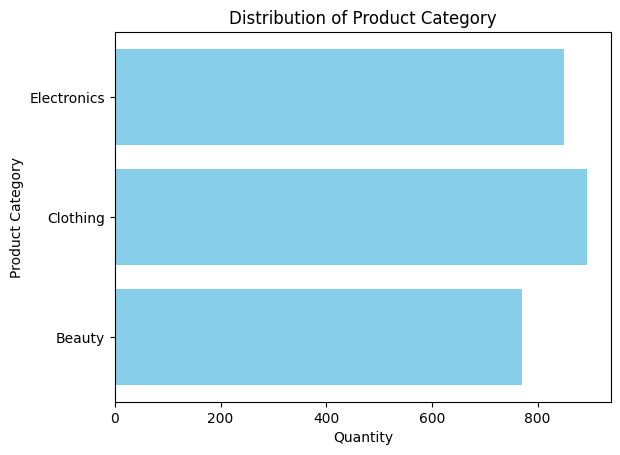

In [164]:
# Plotting our finds
plt.barh(product_category, product_dist, color='Skyblue')
plt.title('Distribution of Product Category')
plt.ylabel('Product Category')
plt.xlabel('Quantity')
plt.show()

#### Task 5: Finding most and least expensive products in each category

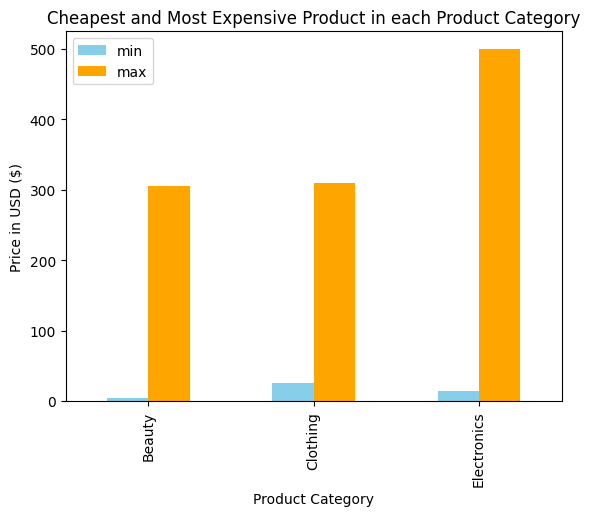

In [170]:
min_max_price = df.groupby(['Product Category'])['Price per Unit'].agg(['min','max'])

min_max_price.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Cheapest and Most Expensive Product in each Product Category')
plt.ylabel('Price in USD ($)')
plt.show()

#### Task 6: Creating a month and sales column

In [124]:
df['Sales'] = df['Quantity'] * df['Price per Unit']
df['Month'] = df['Date'].dt.month

In [125]:
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Month,Sales
Transaction ID,,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,11,150
2,2023-02-27,CUST002,Female,26,Clothing,2,250,2,500
3,2023-01-13,CUST003,Male,50,Electronics,1,30,1,30
4,2023-05-21,CUST004,Male,37,Clothing,1,250,5,250
5,2023-05-06,CUST005,Male,30,Beauty,2,50,5,100


In [128]:
monthly_sales = df.groupby(['Month'])['Sales'].sum()

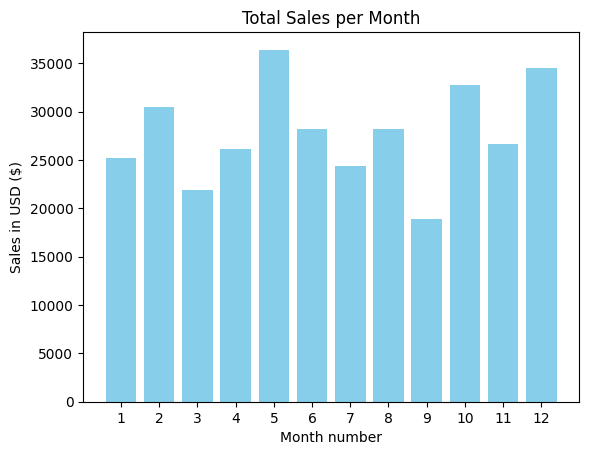

In [151]:
months = range(1, 13)

plt.bar(months, monthly_sales, color='Skyblue')
plt.title('Total Sales per Month')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Task 7: Create a heatmap to analyse the correlation between gender and product category

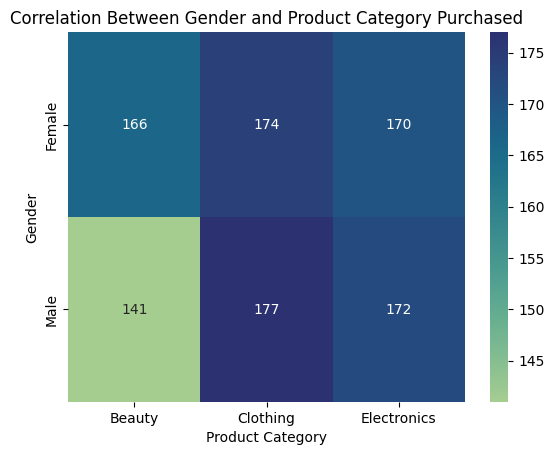

In [150]:
# Create a pandas dataframe for Gender and Product Category
table = pd.crosstab(df['Gender'], df['Product Category'])

# Plot a heatmap
sns.heatmap(table, annot=True, fmt='d', cmap='crest')
plt.title('Correlation Between Gender and Product Category Purchased')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()